___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Autoencoder Exercise - Solutions

## Complete the Tasks Below

**TASK: Run the imports below**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## The Data

 In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.

The table shows some interesting variations across different food types, but overall differences aren't so notable. 

**TASK: Run the import line below to read in the data**

In [ ]:
df = pd.read_csv('../DATA/UK_foods.csv',index_col='Unnamed: 0')

**TASK: Display the DataFrame**

In [ ]:
#CODE HERE

In [ ]:
df

**TASK: Transpose the DataFrame so that the columns are now the index.**

In [ ]:
#CODE HERE

In [ ]:
df.transpose()

**TASK: Create a heatmap from the DataFrame. Does any country really stand out as different than the others? It should be tricky to tell just from the image. Do any two countries appear to be very similar?**

In [7]:
#CODE HERE

<Axes: >

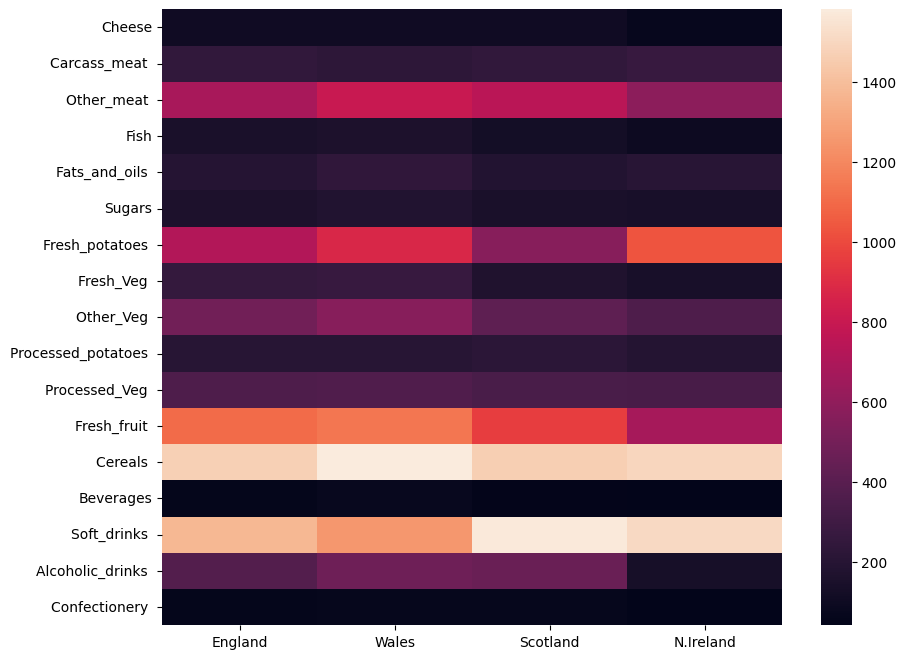

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df)

**TASK: Run the imports necessary to build an autoencoder. Our goal will be to reduce the dimensions from 17 --> 2 and see if any countries stand out as very different.**

In [9]:
#CODE HERE

In [10]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

**TASK: Create an encoder. In the solutions we built one that went 17 --> 8 --> 4 --> 2**

In [11]:
#CODE HERE

In [12]:
encoder = Sequential()
encoder.add(Input(shape=(x,)))
encoder.add(Dense(units=8,activation='relu',input_shape=[17]))
encoder.add(Dense(units=4,activation='relu',input_shape=[8]))
encoder.add(Dense(units=2,activation='relu',input_shape=[4]))

**TASK: Create a decoder. In the solutions we built one that went 2-->4-->8-->17**

In [13]:
#CODE HERE

In [14]:
decoder = Sequential()
decoder.add(Dense(units=4,activation='relu',input_shape=[2]))
decoder.add(Dense(units=8,activation='relu',input_shape=[4]))
decoder.add(Dense(units=17,activation='relu',input_shape=[8]))

**TASK: Combine the encoder and decoder to be an autoencoder.**

In [15]:
#CODE HERE

In [16]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

**TASK: Create a MinMaxScaler to scale the data. Make sure to transpose the data, since we really have 17 feature columns and only 4 rows (one per country).**

In [17]:
#CODE HERE

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [20]:
scaled_df = scaler.fit_transform(df.transpose().values)

In [38]:
scaled_df

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

**TASK: Fit the autoencoder to the scaled data for 15 epochs.**

In [31]:
#CODE HERE

In [39]:
autoencoder.fit(scaled_df,scaled_df,epochs=15)

Train on 4 samples
Epoch 1/15
4/4 [==============================] - 0s 2ms/sample - loss: 0.1852
Epoch 2/15
4/4 [==============================] - 0s 493us/sample - loss: 0.1830
Epoch 3/15
4/4 [==============================] - 0s 529us/sample - loss: 0.1824
Epoch 4/15
4/4 [==============================] - 0s 249us/sample - loss: 0.1937
Epoch 5/15
4/4 [==============================] - 0s 517us/sample - loss: 0.1983
Epoch 6/15
4/4 [==============================] - 0s 249us/sample - loss: 0.2722
Epoch 7/15
4/4 [==============================] - 0s 497us/sample - loss: 0.1873
Epoch 8/15
4/4 [==============================] - 0s 499us/sample - loss: 0.1760
Epoch 9/15
4/4 [==============================] - 0s 498us/sample - loss: 0.1710
Epoch 10/15
4/4 [==============================] - 0s 497us/sample - loss: 0.1679
Epoch 11/15
4/4 [==============================] - 0s 497us/sample - loss: 0.1782
Epoch 12/15
4/4 [==============================] - 0s 498us/sample - loss: 0.2013
Epoch 13

**TASK: Run the scaled data through only the encoder and predict the reduced dimensionalty output. Note: You will most likely get different results than us due to random initialiations.**

In [40]:
#CODE HERE

In [41]:
encoded_2dim = encoder.predict(scaled_df)

In [42]:
encoded_2dim

array([[1.1485099, 0.       ],
       [1.511098 , 0.       ],
       [1.1649266, 0.       ],
       [0.       , 0.       ]], dtype=float32)

**TASK: Join the encoded 2 dimensional data with the original countries index. Triple check the index order to make sure its joined correctly. There are many ways to do this with pandas.**

In [43]:
#Code here

In [44]:
df.transpose().index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [45]:
results = pd.DataFrame(data=encoded_2dim,index=df.transpose().index,
                      columns=['C1','C2'])

In [46]:
results = results.reset_index()

In [47]:
results

,index,C1,C2
0,England,1.148510,0.0
1,Wales,1.511098,0.0
2,Scotland,1.164927,0.0
3,N.Ireland,0.000000,0.0


**TASK: Now plot out these results in a scatterplot, labeled by their respective country. You should see N. Ireland further away from the other points (but not necessarily to the left or the right, could be centered further away from the others).**

In [48]:
#CODE HERE

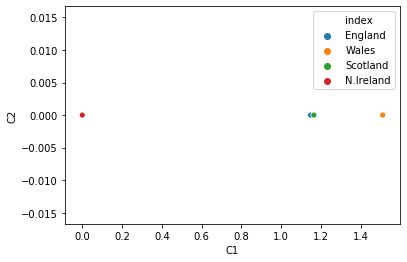

In [49]:
sns.scatterplot(x='C1',y='C2',data=results,hue='index')

 Once we go back and look at the data in the table, this makes sense: the Northern Irish eat way more grams of fresh potatoes and way fewer of fresh fruits, cheese, fish and alcoholic drinks. It's a good sign that structure we've visualized reflects a big fact of real-world geography: Northern Ireland is the only of the four countries not on the island of Great Britain. (If you're confused about the differences among England, the UK and Great Britain, see: this [video](https://www.youtube.com/watch?v=rNu8XDBSn10).)